In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [161]:
df1 = pd.read_csv("solnStatic.csv", index_col=0)
df2 = pd.read_csv("soln3Times.csv", index_col=0)
df3 = pd.read_csv("solnDynamic.csv", index_col=0)

In [162]:
df1

,job_id,category,machine,start_time,end_time,flow_time,arrival_time,processing_time
0,0,2,7,16,31,15,1,15
1,1,0,5,1,31,0,1,30
2,2,2,1,16,31,15,1,15
3,3,2,6,46,61,45,1,15
4,4,0,4,1,31,0,1,30
...,...,...,...,...,...,...,...,...
95,95,0,0,226,256,56,170,30
96,96,0,6,196,226,26,170,30
97,97,2,5,196,211,26,170,15
98,98,0,4,196,226,26,170,30


In [163]:
mean_arrival1 = df1.groupby("arrival_time")["flow_time"].mean()
mean_arrival2 = df2.groupby("arrival_time")["flow_time"].mean()
mean_arrival3 = df3.groupby("arrival_time")["flow_time"].mean()
mean_arrival1

arrival_time
1      15.75
45     19.00
90     21.25
135    25.20
170    32.60
Name: flow_time, dtype: float64

In [164]:
max_arrival1 = df1.groupby("arrival_time")["flow_time"].max()
max_arrival2 = df2.groupby("arrival_time")["flow_time"].max()
max_arrival3 = df3.groupby("arrival_time")["flow_time"].max()
max_arrival1

arrival_time
1      45
45     46
90     46
135    50
170    56
Name: flow_time, dtype: int64

Text(0.5, 1.0, 'Mean/Max Wait-Time by Arrival Time')

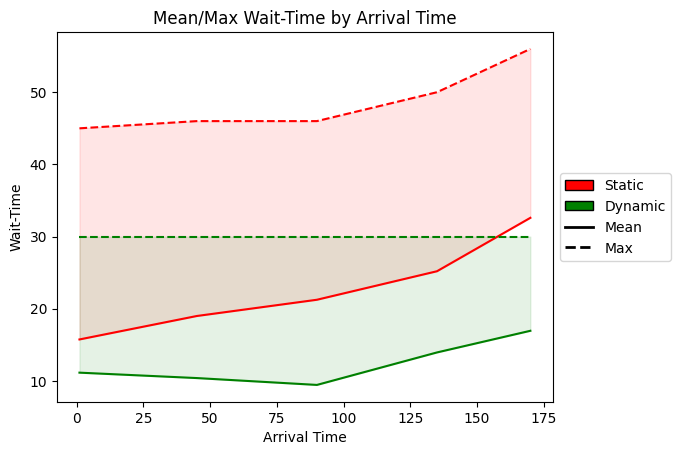

In [165]:
plt.plot(mean_arrival1.index, mean_arrival1, label = "Mean Wait", color="red")
#plt.plot(mean_arrival2.index, mean_arrival2, label = "Mean Wait", color="orange")
plt.plot(mean_arrival3.index, mean_arrival3, label = "Mean Wait", color="green")
plt.plot(max_arrival1.index, max_arrival1, label="Max Wait", linestyle="dashed", color = "red")
#plt.plot(max_arrival2.index, max_arrival2, label="Max Wait", linestyle="dashed", color = "orange")
plt.plot(max_arrival3.index, max_arrival3, label="Max Wait", linestyle="dashed", color = "green")
plt.fill_between(mean_arrival1.index, mean_arrival1, max_arrival1, color='red', alpha=0.1)
plt.fill_between(mean_arrival3.index, mean_arrival3, max_arrival3, color='green', alpha=0.1)
# Create custom legend entries
color_legend = [
    Patch(facecolor="red", edgecolor="black", label="Static"),
    Patch(facecolor="green", edgecolor="black", label="Dynamic"),
    #Line2D([0], [0], color="orange", lw=2, label="3 Categories"),
]

style_legend = [
    Line2D([0], [0], color="black", linestyle="-", lw=2, label="Mean"),
    Line2D([0], [0], color="black", linestyle="--", lw=2, label="Max")
]

# Combine both parts in one legend
legend_elements = color_legend + style_legend
# Place legend outside to the right
plt.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1, 0.5)  # (x, y) - 1 = just right of plot, 0.5 = vertical center
)
plt.xlabel("Arrival Time")
plt.ylabel("Wait-Time")
plt.title("Mean/Max Wait-Time by Arrival Time")